<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Real_World_Applications_Ultralytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Source code](https://docs.ultralytics.com/guides/object-counting/#real-world-applications)

In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

In [2]:
!pip install ultralytics
clear_output()

In [3]:
import ultralytics
from ultralytics.solutions import object_counter
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

In [4]:
import cv2
import numpy as np
import time

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []

# Load class names from coco file
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Load video
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize variables for frame extraction
frame_rate = 60  # Extract one frame per minute
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    if frame_count % frame_rate == 0:
        # Preprocess the frame for YOLO
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(net.getUnconnectedOutLayersNames())

        # Process YOLO output
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                if confidence > 0.5:
                    # Extract detection details
                    center_x = int(detection[0] * frame.shape[1])
                    center_y = int(detection[1] * frame.shape[0])
                    width = int(detection[2] * frame.shape[1])
                    height = int(detection[3] * frame.shape[0])

                    x = int(center_x - width / 2)
                    y = int(center_y - height / 2)

                    # Draw a box and label on the frame
                    cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)
                    label = f"{classes[class_id]}: {confidence:.2f}"
                    cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the frame with detections
        cv2.imshow("DISPLAYING: FRAME | Detections", frame)
        cv2.waitKey(0)

cap.release()
cv2.destroyAllWindows()

error: ignored

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

# results = model.train(data='coco8-pose.yaml', epochs=10, imgsz=640)
video_path ="/content/drive/MyDrive/DATA/Numbers/Fox hunting birds in a pond - Free Stock Video.mp4"
output_path= "/content/055.mp4"

cap = cv2.VideoCapture(video_path)

ret = True

while ret:
  ret, frame = cap.read()

  #Detect and Track Objects
  results = model.track(frame, persist=True)

  frame_ = results[0].plot()

  cv2_imshow(frame_)
  if cv2.waitKey(25) & 0xFF == ord('q'):
    break

#Object Counting using YOLOv8
[Video source](https://mixkit.co/free-stock-video/fox-hunting-birds-in-a-pond-11380/)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


0: 384x640 (no detections), 847.8ms
Speed: 4.2ms preprocess, 847.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


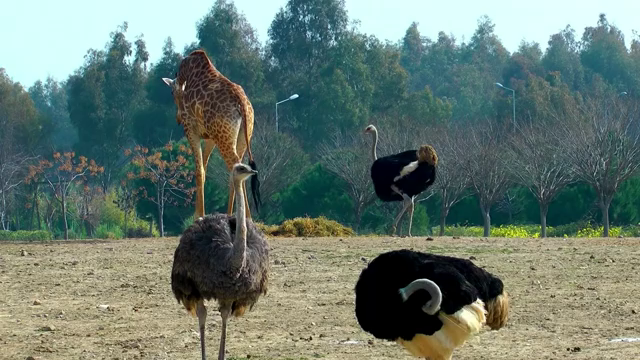

In [ ]:
model = ultralytics.YOLO("yolov8n.pt")
cap = cv2.VideoCapture("/content/drive/MyDrive/DATA/Numbers/Fox hunting birds in a pond - Free Stock Video.mp4")
assert cap.isOpened(), "Error reading video file"

# Define line/Region points
points = [(20, 400), (1080, 400)]                         # Line Points
# points = [(20, 400), (1080, 404), (1080, 360), (20, 360)] # Region Points

# classes_to_count = [0, 2]  # person and car classes for count
classes_to_count = [0]  # person


# Video writer
video_writer = cv2.VideoWriter("object_counting_output.avi",
                              cv2.VideoWriter_fourcc(*'mp4v'),
                              int(cap.get(5)),
                              (int(cap.get(3)), int(cap.get(4))))

# Init Object Counter
counter = object_counter.ObjectCounter()
counter.set_args(view_img=True,
                 reg_pts=points,
                 classes_names=model.names,
                 draw_tracks=True)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=True, classes=classes_to_count)

    im0 = tracks[0].plot()
    cv2_imshow(im0)
    # im0 = counter.start_counting(im0, tracks)
    # cv2_imshow(frame_)

    video_writer.write(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()

#[test](https://medium.com/@batuhansenerr/objects-counting-algorithm-on-shelves-with-yolov8-682dcdc0f451)

In [ ]:
import numpy as np
from ultralytics import YOLO

model = YOLO('best.pt')
result=model.predict(
   source='test_88.jpg',
   conf=0.45,
    save=True
)

FileNotFoundError: ignored